### Imports & Definitions

In [1]:
import sys
sys.path.append("../../utils")
from definitions import *
from matplotlib_helpers import plot_tokens_distributions_by_attempt_without_path

/opt/homebrew/lib/python3.11/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


/opt/homebrew/lib/python3.11/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


### Process results

In [2]:
accuracies = defaultdict(lambda: defaultdict(int))
for file in Path("landmark_passkey_results/").glob("*.json"):
    if "tokens" in file.stem:
        continue
    with open(file, "r") as f:
        res = json.load(f)
    model, n = file.stem.split("_")
    accuracies[model][n] = res["accuracy"] / 100
print(accuracies[MISTRAL_7B])

defaultdict(<class 'int'>, {'14000': 1.0, '1000': 1.0, '8000': 1.0, '20000': 0.76, '100': 1.0, '5000': 1.0, '25000': 0.54, '0': 1.0, '12000': 1.0, '10000': 1.0, '500': 1.0, '18000': 0.84})


In [28]:
path = METRICS_DIR_PATH.joinpath("landmark_passkey_metric.csv")
df = pd.read_csv(path)
for model_name, entry in accuracies.items():
    n_values = df["n"]
    scores = []
    for n in n_values:
        scores.append(accuracies[model_name][str(n)])
    new_df = pd.DataFrame({model_name: scores})
    all_df = pd.concat((df, new_df), axis=1)
all_df.to_csv(path, index=False)
all_df

,n,llama-2-7b,mistral-7b
0,0,1,1.00
1,100,1,1.00
2,500,1,1.00
3,1000,1,1.00
4,5000,1,1.00
5,8000,1,1.00
6,10000,1,1.00
7,12000,1,1.00
8,14000,1,1.00
9,18000,0,0.84


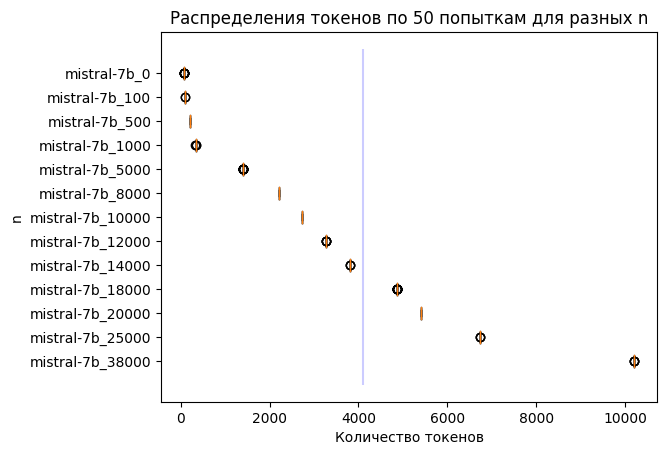

In [3]:
with open("landmark_passkey_results/num_tokens_in_prompt.json", "r") as f:
    tokens = json.load(f)
plot_tokens_distributions_by_attempt_without_path(tokens)